In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
import os
from PIL import Image

parent_dir = r'C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train'
images = []
for image_dir in os.listdir(parent_dir):
    image_dir=os.path.join(parent_dir,image_dir)
    image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('jpg', 'png', 'jpeg'))]

    
    for image_file in image_files:
        image = Image.open(image_file)
        images.append((image_file, image))


In [4]:
img_paths=[image[0] for image in images]

In [5]:
# Load the reference image (the one to match against)
reference_image = cv2.imread(r"C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\test\short-sleeve\images (5).jpeg")
# Load the list of images
loaded_images = [cv2.imread(img) for img in img_paths]


In [6]:
# Define the fixed size (width, height)
fixed_size = (224, 224)  # Example size, can be adjusted

# Function to resize an image
def resize_image(image, size):
    return cv2.resize(image, size)

In [7]:
# Resize all images to the fixed size
resized_images = [resize_image(img, fixed_size) for img in loaded_images]
reference_image=resize_image(reference_image,fixed_size)

In [8]:
def mse(imageA, imageB):
    # Compute the mean squared error between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
errors=[]
for img in resized_images:
    error = mse(reference_image, img)
    errors.append(error)
    print(f'MSE with reference image: {error}')


MSE with reference image: 38442.2112763074
MSE with reference image: 27940.80572385204
MSE with reference image: 27495.94413663903
MSE with reference image: 51906.200952646686
MSE with reference image: 42347.6826171875
MSE with reference image: 40010.18482940051
MSE with reference image: 18681.744539221938
MSE with reference image: 17347.23018973214
MSE with reference image: 20326.306461256376
MSE with reference image: 21668.374123086734
MSE with reference image: 51773.17649872449
MSE with reference image: 58318.23301977041
MSE with reference image: 27041.082330197703
MSE with reference image: 26184.38227439413
MSE with reference image: 18721.22538663903
MSE with reference image: 29360.182198660714
MSE with reference image: 58869.21809231505
MSE with reference image: 42000.851542570155
MSE with reference image: 54809.73026945153
MSE with reference image: 48491.1171476403
MSE with reference image: 34977.07051179847
MSE with reference image: 48258.11786511479
MSE with reference image: 25

In [9]:
path_img_error_tuple=list(zip(img_paths,resized_images,errors))

In [10]:
print(len(img_paths))
print(len(loaded_images))
print(len(errors))

344
344
344


In [11]:
path_img_error_tuple.sort(key=lambda x: x[2])
image_list=[x[1] for x in path_img_error_tuple]

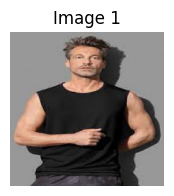

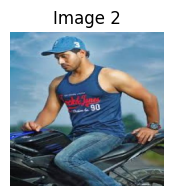

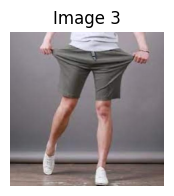

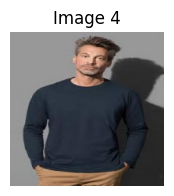

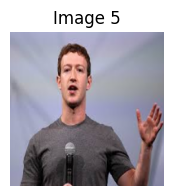

In [12]:
# Convert images from BGR (OpenCV default) to RGB for correct display with matplotlib
rgb_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in image_list]

# Display images using matplotlib
for i, img in enumerate(rgb_images[:5]):
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(f'Image {i+1}')
    plt.axis('off')  # Hide axes
    plt.show()

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

reference_image_vector = reference_image.flatten()

most_similar = -1
most_similar_img = ""
for path, img, err in path_img_error_tuple:
    img_vector = img.flatten()
    print(img_vector.shape)
    similarity = cosine_similarity([reference_image_vector], [img_vector])[0][0]
    if similarity > most_similar:
        most_similar = similarity
        most_similar_img = img


(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)
(150528,)


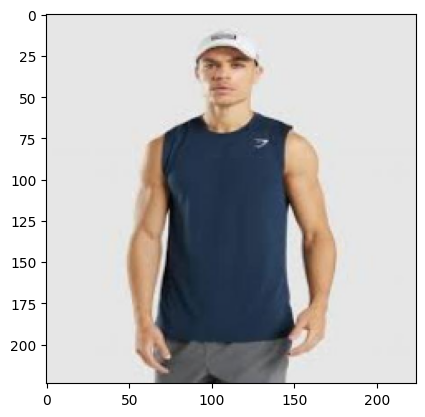

In [14]:
most_similar_img=cv2.cvtColor(most_similar_img, cv2.COLOR_BGR2RGB)
plt.imshow(most_similar_img)